In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Training/Datasets/Week8/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [7]:
len(data[data['Balance'] == 0])

3617

In [8]:
data['Balance'] = data['Balance'].replace({0:data['Balance'].mean()})

In [9]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


In [10]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [12]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,76485.889288,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.860000,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.800000,3,1,0,113931.57,1
3,699,France,Female,39,1,76485.889288,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.820000,1,1,1,79084.10,0


In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()

In [15]:
scaled_data = data.copy()

In [16]:
col_names = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']
features = scaled_data[col_names]
sc = StandardScaler()
scaled_features = sc.fit_transform(features.values)

In [17]:
scaled_features.shape

(10000, 4)

In [23]:
scaled_data[col_names] = scaled_features
data = scaled_data
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2,-0.869761,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1,-0.639565,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8,1.745183,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1,-0.869761,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2,0.671538,1,1,1,-0.365276,0


In [24]:
data = pd.get_dummies(data)

In [25]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,2,-0.869761,1,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,1,-0.639565,1,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,8,1.745183,3,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,1,-0.869761,2,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,2,0.671538,1,1,1,-0.365276,0,0,0,1,1,0


In [26]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [27]:
data = pd.DataFrame(data, columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Exited'])

In [28]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,-0.326221,0.293517,2,-0.869761,1,1,1,0.021886,1,0,0,1,0,1
1,-0.440036,0.198164,1,-0.639565,1,0,1,0.216534,0,0,1,1,0,0
2,-1.536794,0.293517,8,1.745183,3,1,0,0.240687,1,0,0,1,0,1
3,0.501521,0.007457,1,-0.869761,2,0,0,-0.108918,1,0,0,1,0,0
4,2.063884,0.388871,2,0.671538,1,1,1,-0.365276,0,0,1,1,0,0


In [29]:
X_train, y_train, X_test, y_test = (data.iloc[:7500,:13], data.iloc[:7500,13:], data.iloc[7500:,:13], data.iloc[7500:,13:])



In [30]:
X_train = X_train.T.values
y_train = y_train.T.values
X_test = X_test.T.values
y_test = y_test.T.values

# Implementing one layer neural network

In [31]:
def sigmoid(Z):
    A = 1 / (1 + (np.exp(-Z)))
    
    return A

In [32]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w,b

In [33]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    #forward propogation 
    A = sigmoid(np.dot(w.T, X) + b) 
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  
    
    
    # backward propogation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)    
    
    grads = {
        'dw' : dw,
        'db' : db,
        'A'  : A
    }
    
    return grads, cost

In [34]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w - learning_rate * dw  
        b = b - learning_rate * db
        
        costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs        

In [35]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w - learning_rate * dw  
        b = b - learning_rate * db
        
        costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs        

In [71]:
def model(X_train, Y_train, X_test, Y_test, num_iterations=5000, learning_rate=0.01):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    params, grads, costs  = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params["w"]
    b = params["b"]
        
    d = {"costs": costs,
         "w" : w, 
         "b" : b,
          }
    
    return d     

In [72]:
d = model(X_train, y_train, X_test, y_test)

In [73]:
for i in d['costs']:
    print(i)

0.6931471805599453
0.6677492287092172
0.6467819507263207
0.6294304755855276
0.6150209487946143
0.6030040005699352
0.5929355104562102
0.5844579642258257
0.5772839281963551
0.5711821213257648
0.565966025440104
0.5614847389061769
0.5576157094687932
0.5542589926856873
0.5513327260827396
0.5487695616221082
0.5465138491539676
0.5445194068852941
0.5427477505755267
0.541166681670419
0.53974915695994
0.5384723797305171
0.5373170658121978
0.536266848269401
0.5353077924528273
0.5344279992724584
0.5336172792952568
0.5328668839444874
0.5321692829310685
0.5315179792718282
0.530907354990169
0.5303325419619955
0.5297893134481702
0.529273992708705
0.5287833757728249
0.5283146659809587
0.5278654183489938
0.5274334921544925
0.5270170104266833
0.5266143252507028
0.5262239879825794
0.5258447236232866
0.5254754087245926
0.5251150523016562
0.5247627793116199
0.5244178163271822
0.5240794790919824
0.5237471616927756
0.5234203271235606
0.523098499050447
0.5227812546142664
0.5224682181316769
0.5221590555755371
0

0.43835678505074166
0.43834763345493427
0.43833849276664516
0.43832936296553116
0.43832024403130315
0.4383111359437266
0.43830203868262096
0.43829295222785913
0.43828387655936824
0.43827481165712856
0.4382657575011739
0.438256714071591
0.4382476813485198
0.438238659312153
0.4382296479427358
0.43822064722056603
0.4382116571259938
0.4382026776394212
0.4381937087413024
0.4381847504121435
0.4381758026325018
0.43816686538298644
0.4381579386442577
0.4381490223970269
0.43814011662205643
0.43813122130015947
0.4381223364121998
0.4381134619390914
0.43810459786179906
0.43809574416133723
0.4380869008187706
0.4380780678152135
0.43806924513183004
0.4380604327498338
0.4380516306504875
0.43804283881510325
0.438034057225042
0.43802528586171374
0.438016524706577
0.43800777374113875
0.4379990329469546
0.43799030230562813
0.43798158179881114
0.4379728714082033
0.4379641711155521
0.43795548090265246
0.43794680075134684
0.437938130643525
0.4379294705611239
0.4379208204861275
0.43791218040056645
0.4379035502

0.431161962279945
0.43115956124350124
0.43115716201445575
0.43115476459124674
0.43115236897231396
0.43114997515609904
0.43114758314104495
0.43114519292559655
0.4311428045082005
0.4311404178873047
0.4311380330613593
0.4311356500288156
0.4311332687881268
0.43113088933774774
0.43112851167613486
0.43112613580174647
0.4311237617130422
0.4311213894084835
0.4311190188865334
0.43111665014565687
0.43111428318432
0.431111918000991
0.4311095545941395
0.43110719296223676
0.4311048331037558
0.43110247501717097
0.4311001187009586
0.4310977641535965
0.43109541137356405
0.4310930603593423
0.4310907111094141
0.43108836362226355
0.43108601789637657
0.43108367393024083
0.43108133172234525
0.43107899127118077
0.43107665257523964
0.4310743156330158
0.4310719804430047
0.4310696470037038
0.4310673153136115
0.43106498537122834
0.4310626571750562
0.4310603307235985
0.4310580060153605
0.43105568304884884
0.4310533618225717
0.431051042335039
0.4310487245847622
0.4310464085702543
0.4310440942900298
0.431041781742

0.4291506516631684
0.42914969650129375
0.4291487419932863
0.42914778813866494
0.4291468349369491
0.42914588238765866
0.4291449304903138
0.42914397924443526
0.42914302864954396
0.42914207870516125
0.42914112941080906
0.4291401807660095
0.4291392327702851
0.42913828542315885
0.42913733872415405
0.42913639267279446
0.4291354472686041
0.42913450251110763
0.4291335583998298
0.4291326149342959
0.42913167211403164
0.42913072993856294
0.4291297884074164
0.42912884752011876
0.4291279072761971
0.42912696767517905
0.42912602871659256
0.4291250903999661
0.42912415272482823
0.429123215690708
0.4291222792971351
0.4291213435436392
0.42912040842975063
0.429119473955
0.42911854011891837
0.4291176069210371
0.4291166743608878
0.4291157424380028
0.4291148111519146
0.429113880502156
0.4291129504882604
0.4291120211097613
0.42911109236619294
0.4291101642570895
0.42910923678198587
0.4291083099404172
0.4291073837319191
0.4291064581560273
0.4291055332122783
0.4291046089002087
0.4291036852193554
0.42910276216925

In [74]:
w = d['w']
b = d['b']

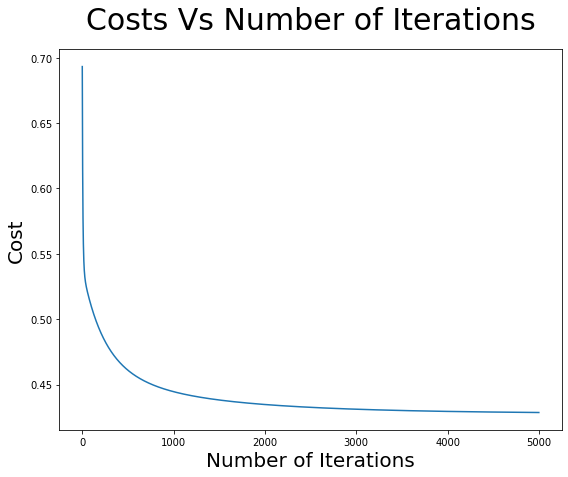

In [77]:
num_iterations = range(5000)

plt.figure(figsize = (9,7))
plt.plot(num_iterations, d['costs'])
plt.xlabel('Number of Iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.title('Costs Vs Number of Iterations', fontsize = 30, pad = 20)
plt.show()

In [78]:
def predict(w, b, test):
    val = sigmoid(np.dot(w.T, test) + b)
    pred = np.round(val)
    return pred

In [79]:
y_pred = predict(w, b, X_test)

In [80]:
y_pred = y_pred.astype('int')

In [81]:
def accuracy(y_test, y_pred):
    true = 0
    false = 0
    for i in range(len(y_test[0])):
        if y_test[0][i] == y_pred[0][i]:
            true += 1
        else:
            false += 1

    accuracy = true * 100 / (true + false)       
    return accuracy

In [82]:
accuracy(y_test, y_pred)

81.24